## Perform clustering for the airlines data to obtain optimum number of clusters.

In [ ]:
#Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
df = pd.read_excel(r'D:\360digi\DS\Sharath\Hierarchical_clustering2\HandsOn\Dataset_Assignment Clustering\EastWestAirlines.xlsx', sheet_name = 1)
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# rename the column
df = df.rename(columns = {'Award?':'Award'})

## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

In [6]:
print(df.mean())
print('\n')
print(df.median())
print('\n')
print(df.mode())

#huge difference in values for mean and median, indicating presence of outliers

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
dtype: float64


ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award                    0.0
dtype: float64


       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1   1000.0         0.0        1.0        1.0        1.0          0.0   
1        2      NaN         NaN        NaN      

In [7]:
#2nd Moment Business Decision(Measure of Dispersion)

In [8]:
print(df.var())
print('\n')
print(df.std())

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award                2.332473e-01
dtype: float64


ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award                     0.482957
dtype: float64


In [9]:
#3rd Business Moment Decision (Skewness)

In [10]:
df.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award                 0.537200
dtype: float64

In [11]:
#4th Business Moment Decision (Kurtosis)

In [12]:
df.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award                 -1.712272
dtype: float64

In [13]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [14]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [15]:
#Drop unwanted column
df.drop(['ID#'], axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [17]:
#Handling duplicates
duplicate = df.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool


1

In [18]:
sum(duplicate)

1

In [19]:
duplicate.unique()  #It contains a 'True' value indicating the duplicate record exists.

array([False,  True])

In [20]:
#Remove duplicates
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award              3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


In [22]:
#Check for missing values
df.isnull().sum() #No missing values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [23]:
#Outlier Analysis

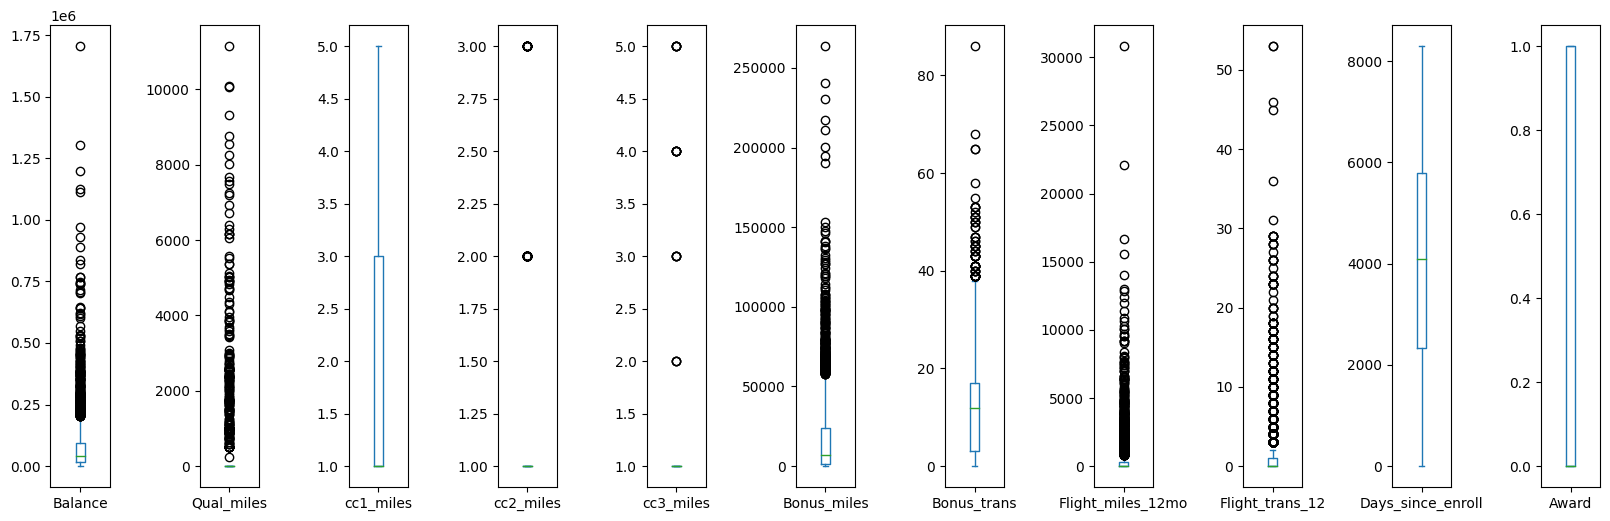

In [24]:
#Box plot visualization to view the outliers.

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Balance, Qual_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12 columns have outliers


In [25]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

# Winsorizaton

In [26]:
# Winsorization for "Balance" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Balance'])

df['Balance'] = winsor.fit_transform(df[['Balance']])


In [27]:
# Winsorization for "Bonus_miles" column
winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['Bonus_miles'])

df['Bonus_miles'] = winsor.fit_transform(df[['Bonus_miles']])

In [28]:
# Winsorization for "Bonus_trans" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Bonus_trans'])

df['Bonus_trans'] = winsor.fit_transform(df[['Bonus_trans']])

In [29]:
# Winsorization for "Flight_miles_12mo" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Flight_miles_12mo'])

df['Flight_miles_12mo'] = winsor.fit_transform(df[['Flight_miles_12mo']])

In [30]:
# Winsorization for "Flight_trans_12" column

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables=['Flight_trans_12'])

df['Flight_trans_12'] = winsor.fit_transform(df[['Flight_trans_12']])

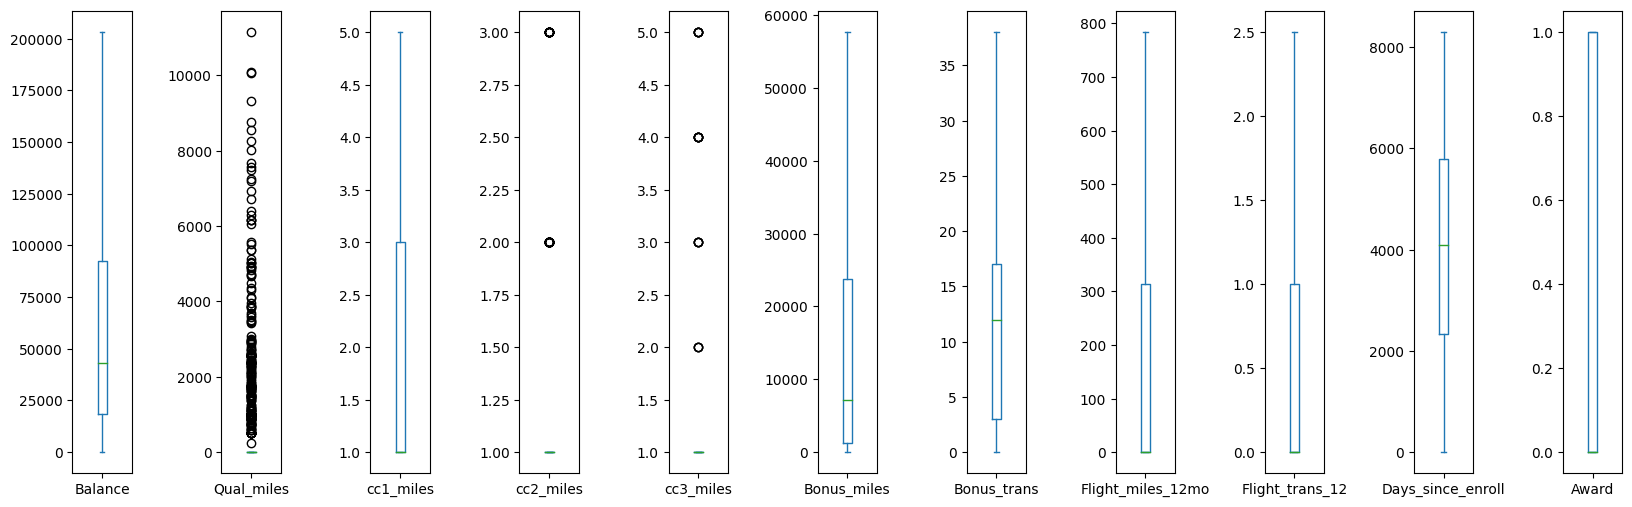

In [31]:
#Box plot visualization to view after the removal of outliers.

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()


In [ ]:
# Winsorization technique cannot be applied to columns 'Qual_miles, cc2_miles, cc3_miles ' because the variation in data is low. 

In [ ]:
# Winsorization for "Qual_miles" column
#winsor = Winsorizer(capping_method = 'iqr', tail =  'both', fold = 1.5, variables = ['Qual_miles'])

#df['Qual_miles'] = winsor.fit_transform(df[['Qual_miles']])

In [ ]:
# Winsorization for "cc2_miles" column
#winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['cc2_miles'])

#df['cc2_miles'] = winsor.fit_transform(df[['cc2_miles']])

In [ ]:
#winsor = Winsorizer(capping_method = 'quantiles', tail= 'both', fold = 0.20, variables = ['cc2_miles'])

#df['cc2_miles'] = winsor.fit_transform(df[['cc2_miles']])

In [ ]:
# Winsorization for "cc3_miles" column
#winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['cc3_miles'])

#df['cc3_miles'] = winsor.fit_transform(df[['cc3_miles']])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3998 non-null   float64
 1   Qual_miles         3998 non-null   int64  
 2   cc1_miles          3998 non-null   int64  
 3   cc2_miles          3998 non-null   int64  
 4   cc3_miles          3998 non-null   int64  
 5   Bonus_miles        3998 non-null   float64
 6   Bonus_trans        3998 non-null   float64
 7   Flight_miles_12mo  3998 non-null   float64
 8   Flight_trans_12    3998 non-null   float64
 9   Days_since_enroll  3998 non-null   int64  
 10  Award              3998 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 374.8 KB


In [ ]:
# We consider these columns 'Qual_miles, cc2_miles, cc3_miles ' as it is and proceed to scale the data.

# Normalization

In [33]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [34]:
df_norm = norm_func(df.iloc[:,:])

In [35]:
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,0.313880,0.012931,0.264945,0.007254,0.003064,0.267405,0.301934,0.228376,0.236668,0.496406,0.370435
std,0.288722,0.069408,0.344247,0.073834,0.048816,0.313598,0.239854,0.378327,0.377959,0.248976,0.482982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091207,0.000000,0.000000,0.000000,0.000000,0.021682,0.078947,0.000000,0.000000,0.280836,0.000000
50%,0.212282,0.000000,0.000000,0.000000,0.000000,0.124593,0.315789,0.000000,0.000000,0.493791,0.000000
75%,0.454724,0.000000,0.500000,0.000000,0.000000,0.413009,0.447368,0.400000,0.400000,0.697944,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.138491,0.0,0.00,0.0,0.0,0.003018,0.026316,0.0,0.0,0.843742,0.0
1,0.094700,0.0,0.00,0.0,0.0,0.003729,0.052632,0.0,0.0,0.839884,0.0
2,0.203503,0.0,0.00,0.0,0.0,0.071515,0.105263,0.0,0.0,0.847842,0.0
3,0.072713,0.0,0.00,0.0,0.0,0.008673,0.026316,0.0,0.0,0.837955,0.0
4,0.481037,0.0,0.75,0.0,0.0,0.751060,0.684211,1.0,1.0,0.835905,1.0


# Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

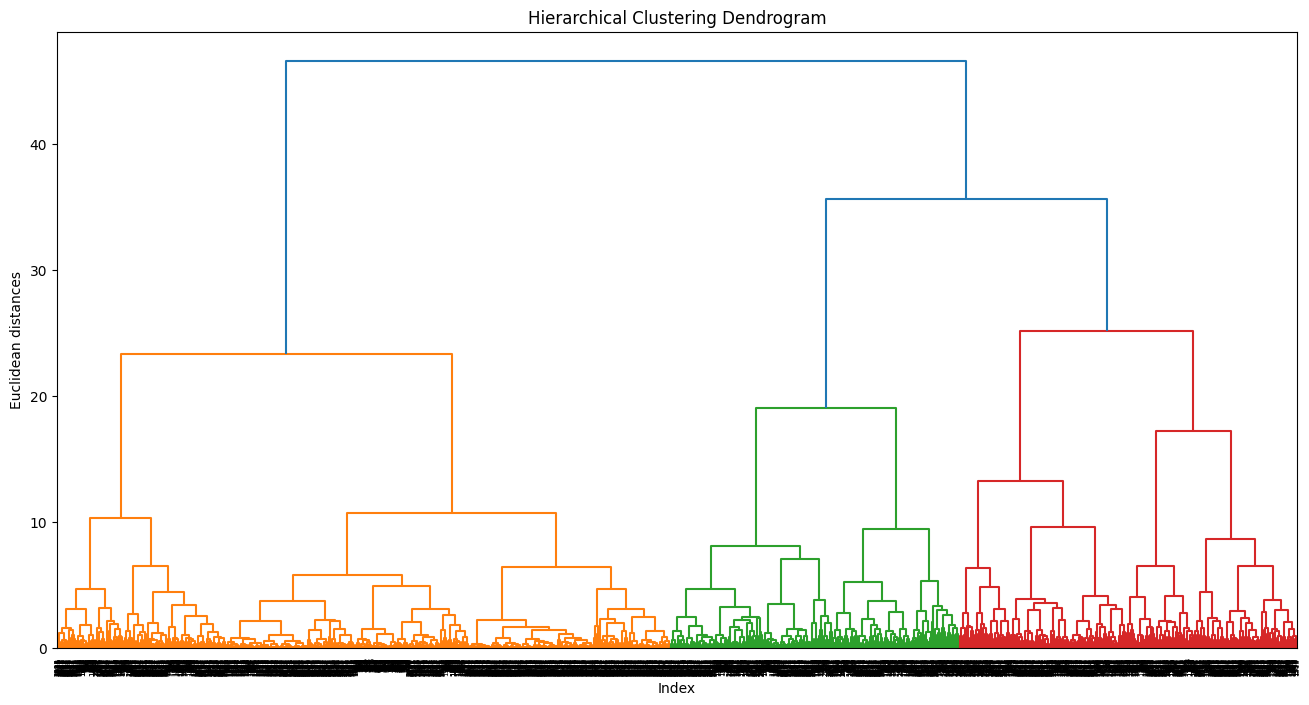

In [38]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_norm, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [41]:
# Applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete' )

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [42]:
np.unique(y_hc1)

array([0, 1, 2], dtype=int64)

In [43]:
#average linkage
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [44]:
np.unique(y_hc2)

array([0, 1, 2], dtype=int64)

In [45]:
#single linkage
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [46]:
np.unique(y_hc3)

array([0, 1, 2], dtype=int64)

In [47]:
# ward
hc4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc4 = hc4.fit_predict(df_norm)
y_hc4

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [48]:
hc1.labels_

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [49]:
cluster_labels = pd.Series(hc1.labels_)

In [50]:
# Add cluster labels to original Dataset
df['cluster'] = cluster_labels
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,0,1.0
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,0,1.0
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,0,1.0
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,0,1.0
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,1,0.0


# Cluster Evaluation

In [51]:
df2 = df.sort_values(by = 'cluster', ascending = True)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
2196,16200.000,0,4,1,1,40455.0,17.0,0.0,0.0,3840,1,0.0
691,105683.000,0,4,1,1,28386.0,17.0,0.0,0.0,6361,0,0.0
692,203211.125,0,4,1,1,30406.0,28.0,150.0,2.0,6319,1,0.0
693,203211.125,0,3,1,1,27390.0,17.0,750.0,1.0,6323,1,0.0
1790,107360.000,0,3,1,1,15641.0,15.0,0.0,0.0,4423,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,23854.000,0,3,1,1,22498.0,18.0,250.0,2.5,4274,1,2.0
2516,40204.000,0,1,1,1,850.0,3.0,350.0,2.0,3006,0,2.0
744,66572.000,0,2,1,1,8048.0,14.0,450.0,2.0,6240,1,2.0
3443,5745.000,0,1,1,1,400.0,4.0,400.0,2.5,1067,0,2.0


In [52]:
# Aggregate by doing mean of each cluster
df2.iloc[:,:].groupby(df2.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster,,,,,,,,,,,
0.0,111070.141916,163.385331,4.045455,1.001033,1.040289,41330.970041,19.791322,269.307335,0.852789,4914.201446,0.579545
1.0,41109.248104,86.947324,1.482090,1.017278,1.003371,6833.798831,8.219975,18.721134,0.087863,3797.384324,0.251159
2.0,76122.846227,322.913110,1.221037,1.024390,1.003049,8246.483994,10.986280,625.740854,2.029726,4114.304878,0.493902


In [53]:
# Customers belonging to cluster 0 - Has highest number of miles and is eligible for award travel. The freq.flyer credit card usage is high in the past 12 months. 
# Customers belonging to cluster 2 - Have high number of miles to qualify for Top flight status. High number of flight miles and flight transactions gained in the past 12 months. 

In [54]:
#Dividing cluster data

In [55]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
2196,16200.000,0,4,1,1,40455.000,17.0,0.0,0.0,3840,1,0.0
691,105683.000,0,4,1,1,28386.000,17.0,0.0,0.0,6361,0,0.0
692,203211.125,0,4,1,1,30406.000,28.0,150.0,2.0,6319,1,0.0
693,203211.125,0,3,1,1,27390.000,17.0,750.0,1.0,6323,1,0.0
1790,107360.000,0,3,1,1,15641.000,15.0,0.0,0.0,4423,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
347,197328.000,0,5,1,1,57651.875,12.0,0.0,0.0,7092,0,0.0
503,203211.125,0,5,1,1,57651.875,19.0,550.0,2.0,6679,0,0.0
348,151301.000,0,4,1,1,37772.000,14.0,0.0,0.0,7092,0,0.0
2819,112197.000,0,4,1,1,32108.000,16.0,0.0,0.0,2013,1,0.0


In [56]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
2787,28010.0,0,1,1,1,150.0,3.0,0.0,0.0,2115,0,1.0
2864,79192.0,0,3,1,1,14404.0,21.0,150.0,1.0,2080,1,1.0
2714,32824.0,0,1,1,1,1660.0,5.0,100.0,1.0,2339,1,1.0
2863,26797.0,0,1,1,1,0.0,0.0,0.0,0.0,1928,0,1.0
2862,15036.0,0,2,1,1,7917.0,8.0,0.0,0.0,1935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1458,46734.0,0,2,1,1,10007.0,18.0,0.0,0.0,5080,0,1.0
1465,57330.0,0,1,1,1,380.0,3.0,0.0,0.0,4986,0,1.0
1530,19998.0,0,1,1,1,4309.0,13.0,0.0,0.0,4995,1,1.0
1543,53869.0,0,1,1,1,6750.0,26.0,0.0,0.0,4940,0,1.0


In [57]:
cluster2 = df2.loc[(df2.cluster == 2), :]
cluster2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1433,120152.0,0,1,1,1,6250.000,27.0,783.75,2.5,4497,1,2.0
1440,57927.0,0,1,1,1,1500.000,3.0,783.75,2.5,5149,1,2.0
3782,8009.0,0,1,1,1,8102.000,12.0,783.75,2.5,3279,1,2.0
2840,8557.0,0,1,1,1,57651.875,5.0,622.00,2.5,1955,1,2.0
2348,9445.0,0,1,1,1,1000.000,2.0,783.75,2.0,3613,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
651,160572.0,0,1,1,1,8163.000,18.0,500.00,1.0,6403,1,2.0
1815,23854.0,0,3,1,1,22498.000,18.0,250.00,2.5,4274,1,2.0
2516,40204.0,0,1,1,1,850.000,3.0,350.00,2.0,3006,0,2.0
744,66572.0,0,2,1,1,8048.000,14.0,450.00,2.0,6240,1,2.0


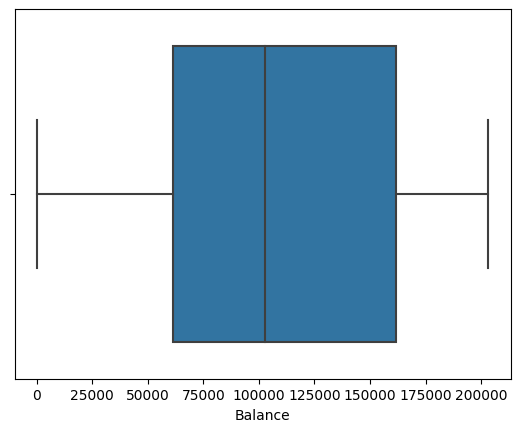

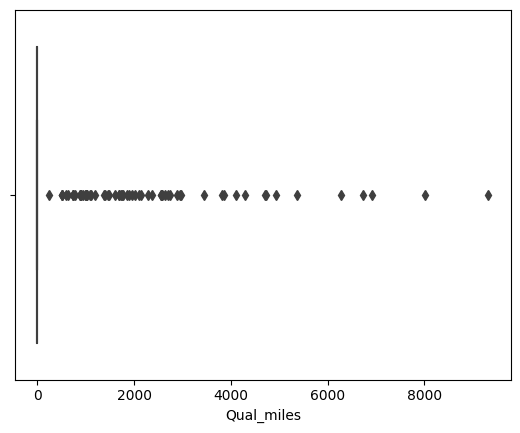

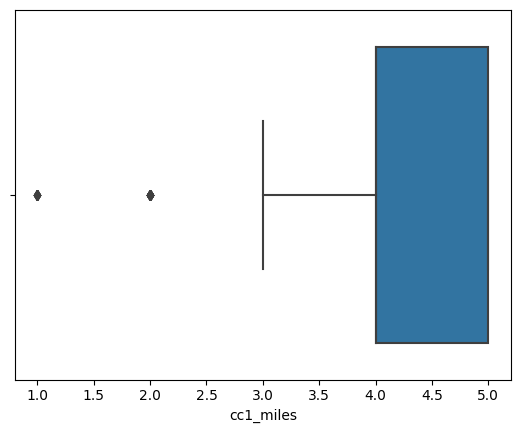

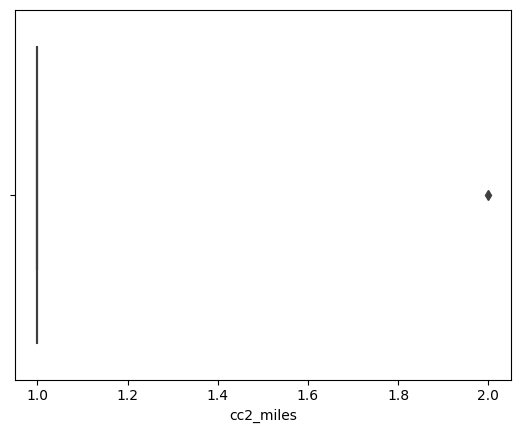

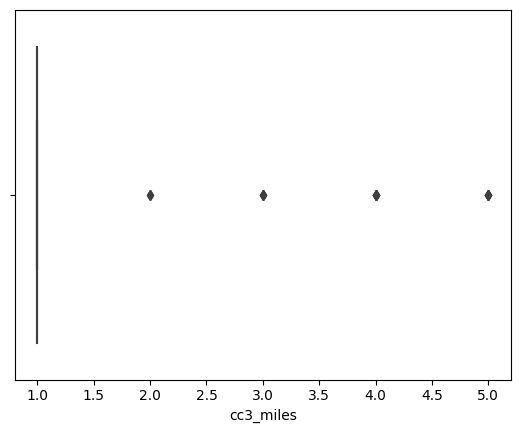

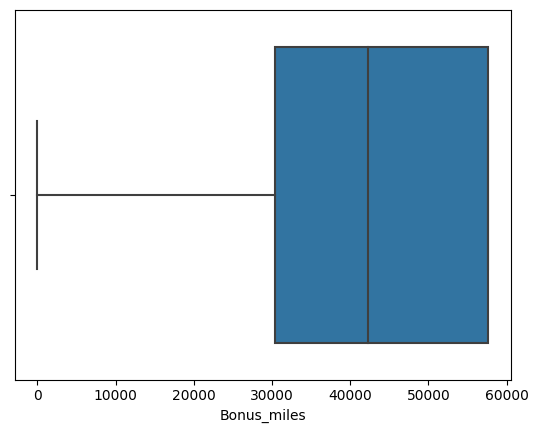

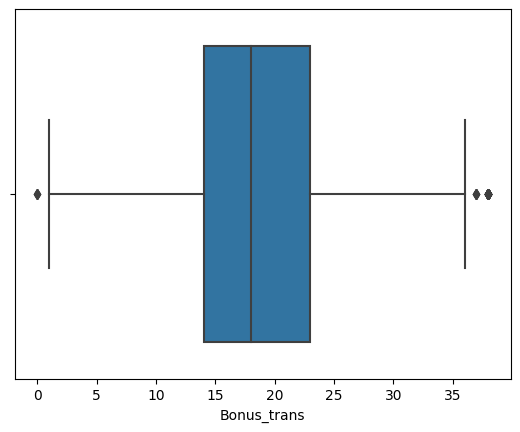

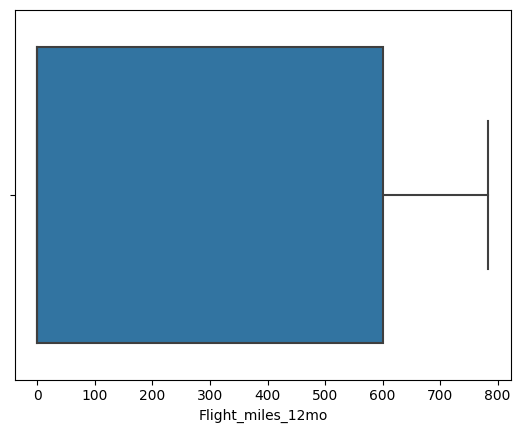

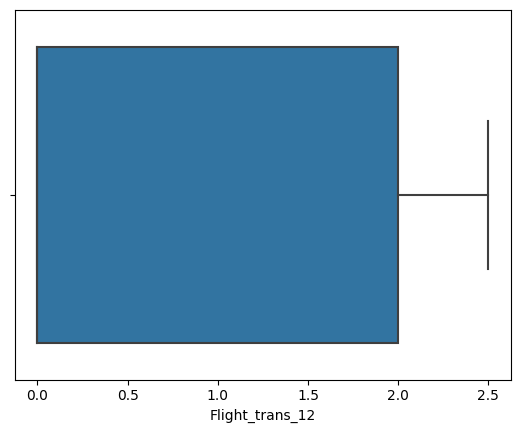

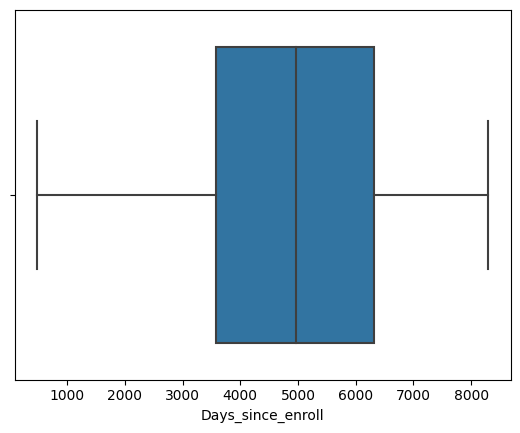

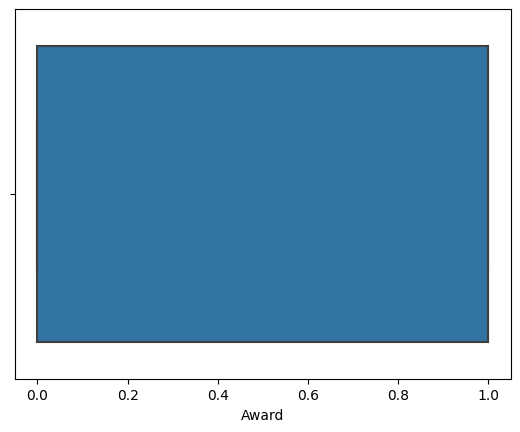

In [58]:
#Another way of evaluating clusters is using outliers
for i in cluster0.columns[:11]:
    sns.boxplot(x = cluster0[i])
    plt.show()

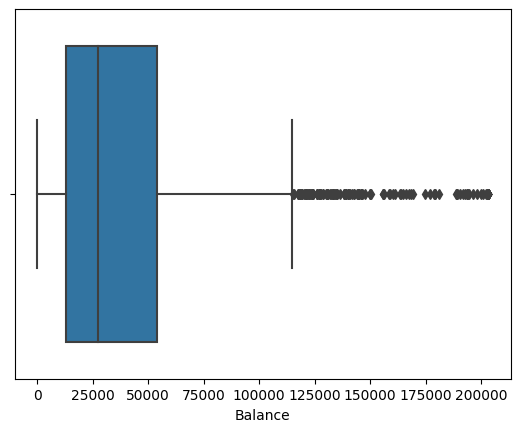

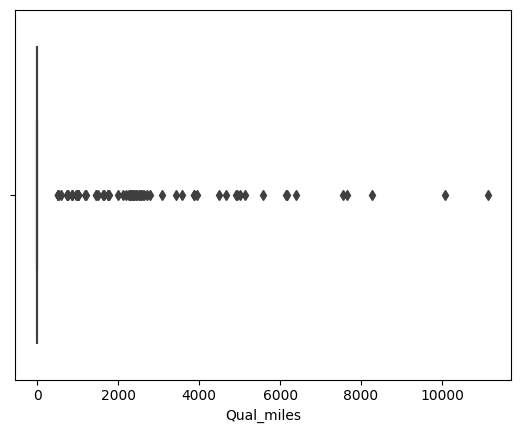

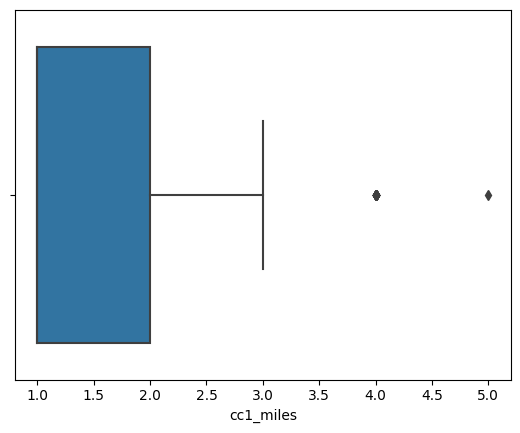

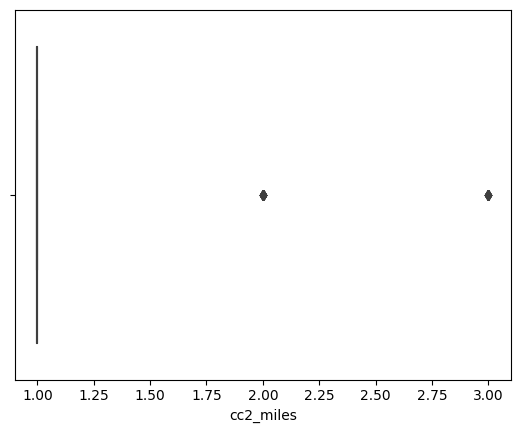

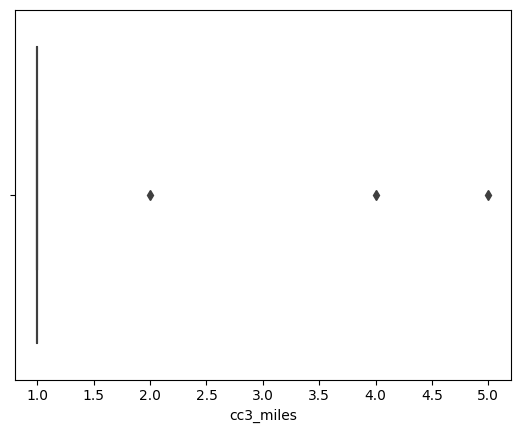

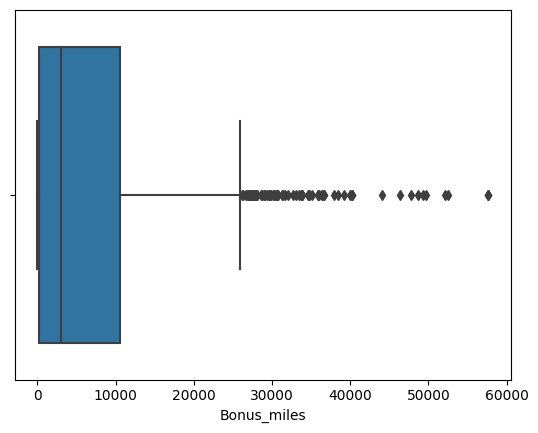

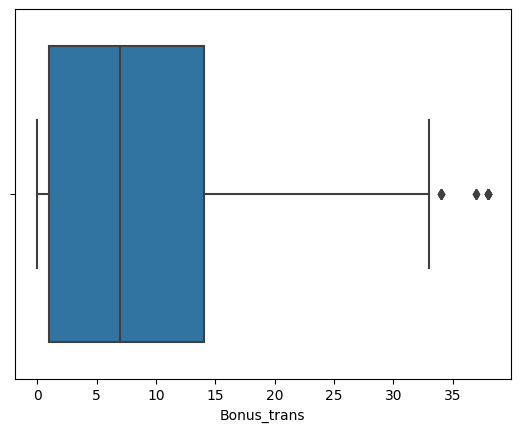

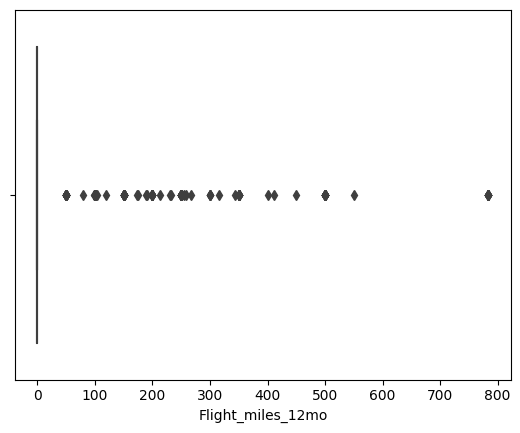

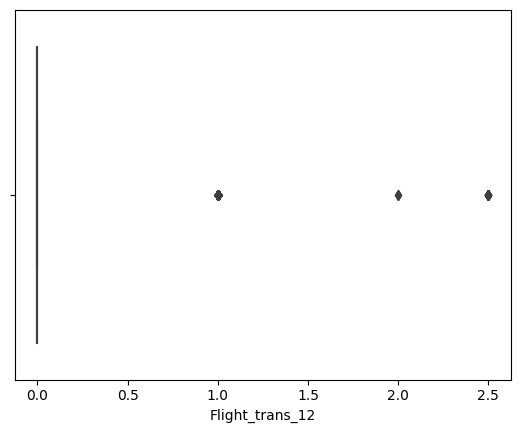

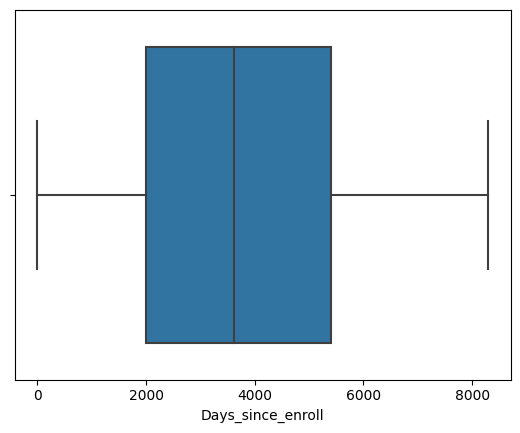

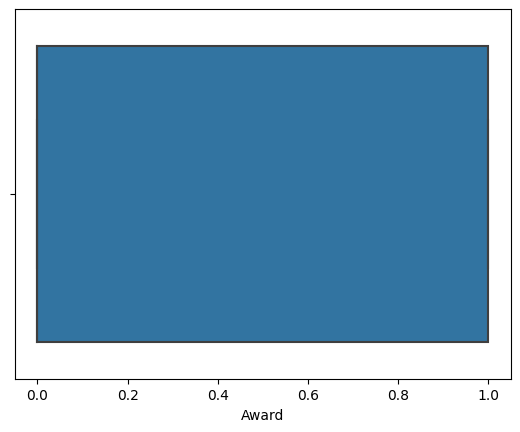

In [59]:
for i in cluster1.columns[:11]:
    sns.boxplot(x = cluster1[i])
    plt.show()

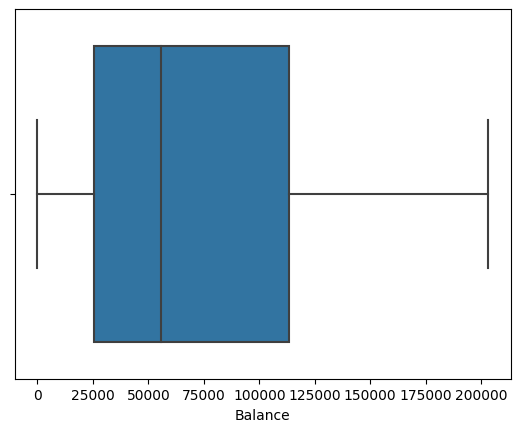

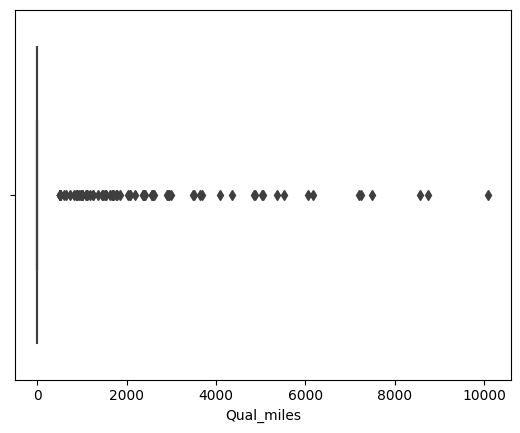

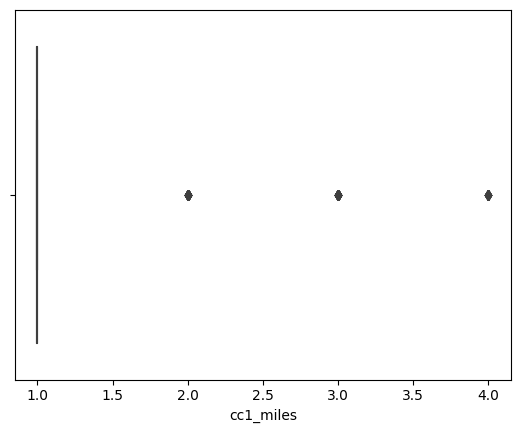

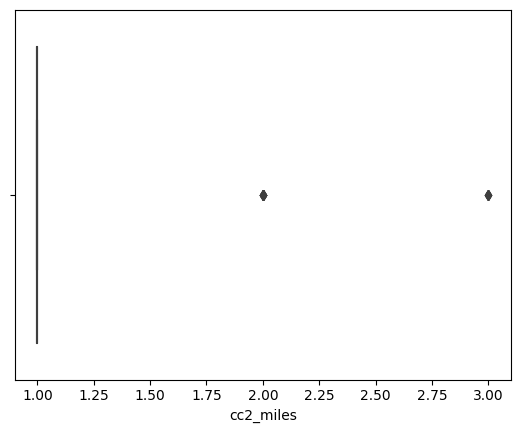

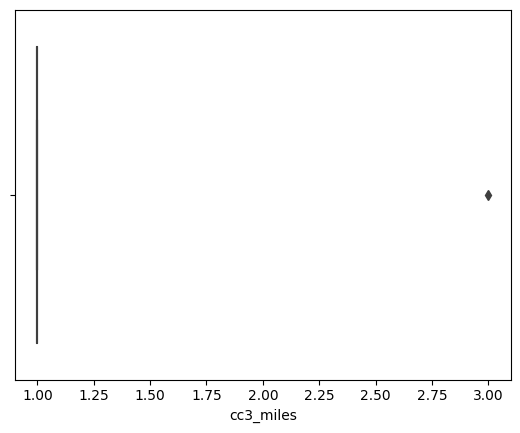

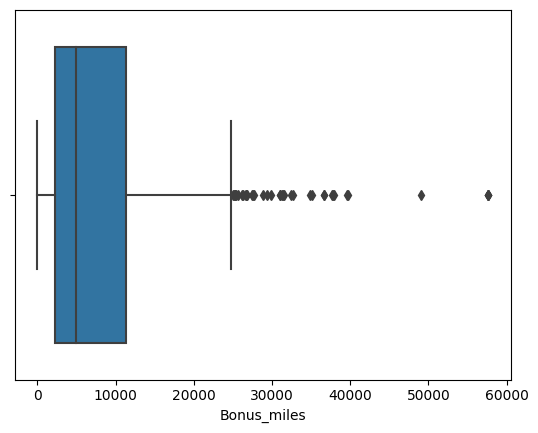

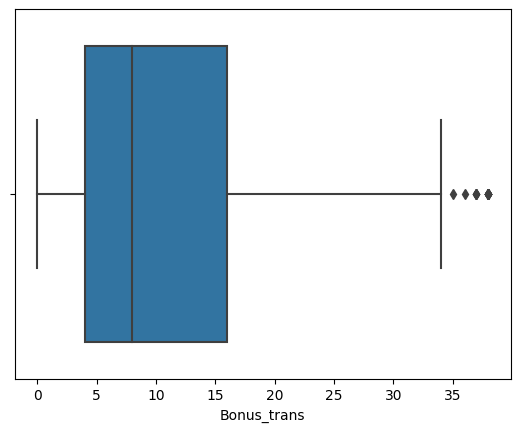

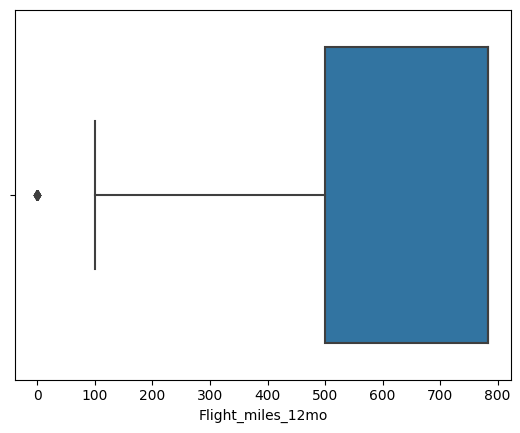

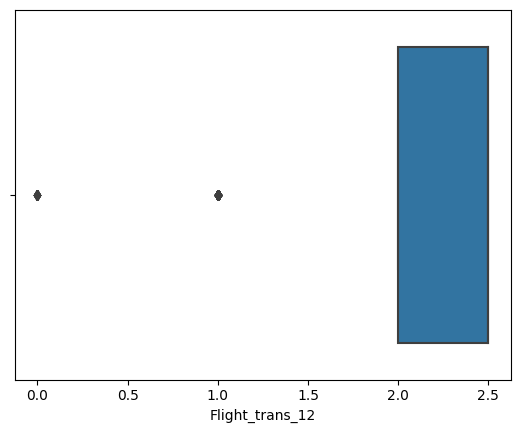

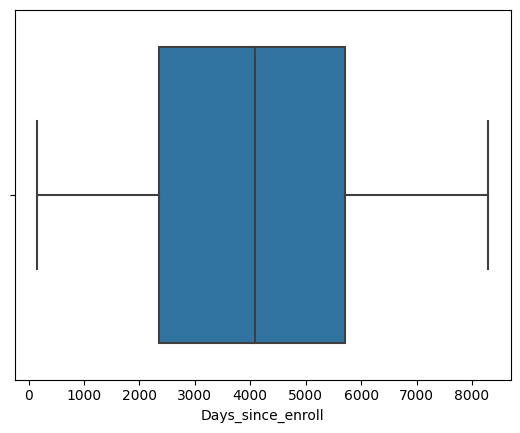

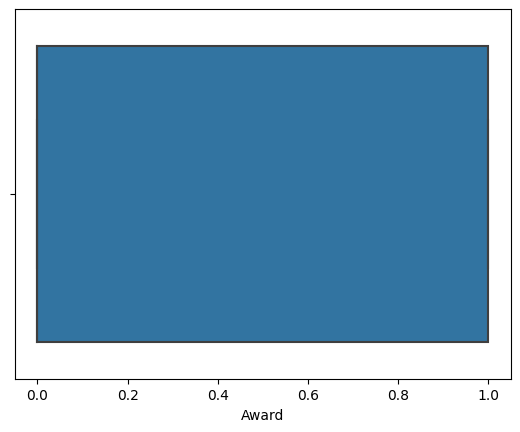

In [60]:
for i in cluster2.columns[:11]:
    sns.boxplot(x = cluster2[i])
    plt.show()

In [61]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.138491,0.0,0.00,0.0,0.0,0.003018,0.026316,0.000000,0.0,0.843742,0.0
1,0.094700,0.0,0.00,0.0,0.0,0.003729,0.052632,0.000000,0.0,0.839884,0.0
2,0.203503,0.0,0.00,0.0,0.0,0.071515,0.105263,0.000000,0.0,0.847842,0.0
3,0.072713,0.0,0.00,0.0,0.0,0.008673,0.026316,0.000000,0.0,0.837955,0.0
4,0.481037,0.0,0.75,0.0,0.0,0.751060,0.684211,1.000000,1.0,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.090920,0.0,0.00,0.0,0.0,0.147870,0.105263,0.255183,0.4,0.168917,1.0
3995,0.316838,0.0,0.00,0.0,0.0,0.017016,0.131579,0.000000,0.0,0.167953,1.0
3996,0.362170,0.0,0.50,0.0,0.0,0.441391,0.210526,0.000000,0.0,0.168797,1.0
3997,0.270157,0.0,0.00,0.0,0.0,0.008673,0.026316,0.637959,0.4,0.168676,0.0


## Cluster Evaluation

### Silhouette coefficient:

In [62]:
from sklearn import metrics

In [ ]:
# Silhouette coefficient value ranges between (-1 to +1). 
# 1 being the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.
# Values near 0 denote overlapping clusters.

In [63]:
metrics.silhouette_score(df_norm, cluster_labels)

0.312108145126427

### Calinski Harabasz:

In [64]:
#Higher value means clusters are well separated
metrics.calinski_harabasz_score(df_norm, cluster_labels)

1346.8278254664665

### Davies-Bouldin Index:

In [65]:
#The lower value means better the separation between your clusters.
metrics.davies_bouldin_score(df_norm, cluster_labels)

1.3932215083297335

In [66]:
from clusteval import clusteval
import numpy as np

#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [67]:
df_array = np.array(df_norm)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:07<00:00,  3.24it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.


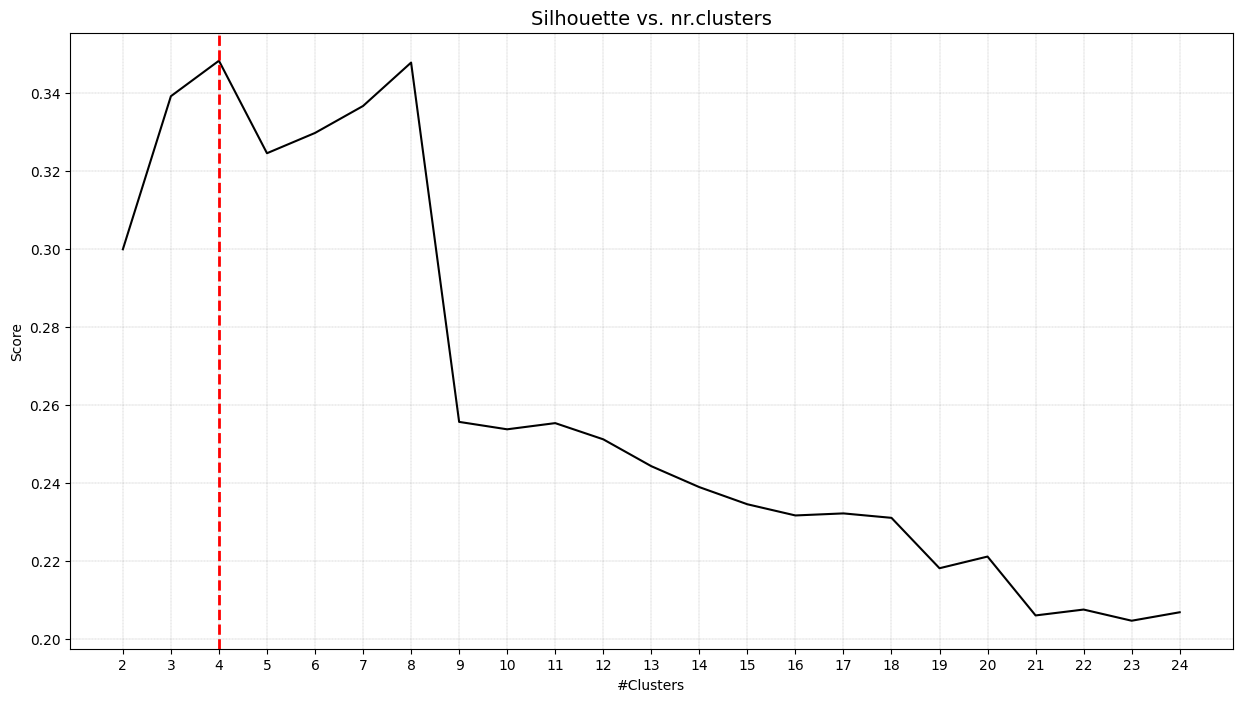

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [68]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
## Using the report from clusteval library building 4 clusters
# Fit using agglomerative with metric: euclidean, and linkage: ward

In [69]:
# Applying AgglomerativeClustering with = 4 as clusters
hc_4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

y_hc_4 = hc_4.fit_predict(df_norm)
y_hc_4

array([0, 0, 0, ..., 2, 3, 0], dtype=int64)

In [70]:
hc_4.labels_

array([0, 0, 0, ..., 2, 3, 0], dtype=int64)

In [71]:
cluster_labels2 = pd.Series(hc_4.labels_)

In [72]:
df_4clust = pd.concat([cluster_labels2, df], axis=1) 

df_4clust.head()

,0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,0.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.00,0.0,7000.0,0.0,1.0
1,0.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.00,0.0,6968.0,0.0,1.0
2,0.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.00,0.0,7034.0,0.0,1.0
3,0.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.00,0.0,6952.0,0.0,1.0
4,1.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,783.75,2.5,6935.0,1.0,0.0


In [73]:
df_4clust = df_4clust.rename(columns = {0:'cluster_new'})
df_4clust.head()

,cluster_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,0.0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.00,0.0,7000.0,0.0,1.0
1,0.0,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.00,0.0,6968.0,0.0,1.0
2,0.0,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.00,0.0,7034.0,0.0,1.0
3,0.0,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.00,0.0,6952.0,0.0,1.0
4,1.0,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,783.75,2.5,6935.0,1.0,0.0


In [74]:
# Aggregate using mean of each cluster
df_4clust.iloc[:,1:12].groupby(df_4clust.cluster_new).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_new,,,,,,,,,,,
0.0,50261.908999,67.863498,1.688574,1.015672,1.008089,9459.361666,8.565723,5.030207,0.017947,3772.092518,0.009606
1.0,97906.691940,423.992714,2.260474,1.023679,1.003643,23102.756148,17.191257,668.377960,2.139344,4630.122040,0.983607
2.0,64121.478115,127.824919,2.878625,1.010741,1.026853,25390.023228,14.351235,67.235768,0.255639,4625.163265,0.984962
3.0,78179.599722,167.538033,1.805195,1.007421,1.011132,12249.601113,11.371058,512.272727,1.702226,4003.638219,0.009276


In [75]:
# By clustering the data into 4 clusters the Airlines can get even more closer insights about the customers. 
# Customers belonging to Cluster 1 - Has highest number of miles eligible for award travel. High chances to be qualified for Top flight status. High number of non flight bonus transactions and number of flight miles in the past 12 months.
# Customers belonging  to Cluster 3 - Has high number of miles eligible for award travel compared to rest of the clusters (0 and 2). They also have high number of non flight bonus transactions and number of flight miles in the past 12 months.
# Customers belonging to Cluster 2 - have earned more number of miles with freq. flyer credit card in the past 12 months. They have high number of miles from non-flight bonus transactions in the past 12 months.


In [76]:
#######################################################

In [77]:
new_df = df_4clust.iloc[:,1:12].groupby(df_4clust.cluster_new).mean()

In [78]:
new_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_new,,,,,,,,,,,
0.0,50261.908999,67.863498,1.688574,1.015672,1.008089,9459.361666,8.565723,5.030207,0.017947,3772.092518,0.009606
1.0,97906.691940,423.992714,2.260474,1.023679,1.003643,23102.756148,17.191257,668.377960,2.139344,4630.122040,0.983607
2.0,64121.478115,127.824919,2.878625,1.010741,1.026853,25390.023228,14.351235,67.235768,0.255639,4625.163265,0.984962
3.0,78179.599722,167.538033,1.805195,1.007421,1.011132,12249.601113,11.371058,512.272727,1.702226,4003.638219,0.009276


In [ ]:
### Additional code to try different way of clustering for below 3 columns. #####

In [ ]:
#The Qual_miles_new column has 0 values in max rows.column cc2_miles and cc3_miles has value 1 in majority rows. 
#These 3 columns can be analysed separately and clustered.

In [ ]:
df_cate = df.iloc[:,[1,3,4]]
df_cate.head()

In [ ]:
df_cate.info()

In [ ]:
df_cate['Qual_miles'].unique()

In [ ]:
df_cate['Qual_miles'].value_counts()

In [ ]:
df_cate['cc2_miles'].unique()

In [ ]:
df_cate['cc2_miles'].value_counts()

In [ ]:
df_cate['cc3_miles'].unique()

In [ ]:
df_cate['cc3_miles'].value_counts()

In [ ]:
df_cate.describe()

In [ ]:
#df_cate['Qual_miles_new'] = (df_cate['Qual_miles']/df_cate['Qual_miles'].max())
df_cate['cc2_miles_new'] = df_cate['cc2_miles']
df_cate['cc3_miles_new'] = df_cate['cc3_miles']

In [ ]:
#df_cate = df_cate.drop(df_cate[df_cate.Qual_miles_new==0].index)
#df_cate = df_cate.drop(df_cate[df_cate.cc2_miles_new==1].index)
df_cate = df_cate.drop(df_cate[df_cate.cc3_miles_new==1].index)

In [ ]:
df_cate.shape

In [ ]:
winsor = Winsorizer(capping_method = 'iqr', tail =  'both', fold = 1.5, variables = ['cc3_miles_new'])

df_cate['cc3_miles_new'] = winsor.fit_transform(df_cate[['cc3_miles_new']])

In [ ]:
#df_cate['Qual_miles_new'] = df_cate['Qual_miles_new']/10000
df_cate.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()